In [1]:
import numpy as np
from aisynphys.database import SynphysDatabase
from aisynphys.cell_class import CellClass

In [2]:
# Download and cache the sqlite file for the requested database
#   (for available versions, see SynphysDatabase.list_versions)
db = SynphysDatabase.load_version('synphys_r1.0_2019-08-29_small.sqlite')
SynphysDatabase.list_versions()

['synphys_r1.0_2019-08-29_small.sqlite',
 'synphys_r1.0_2019-08-29_medium.sqlite',
 'synphys_r1.0_2019-08-29_full.sqlite',
 'synphys_r1.0_small.sqlite',
 'synphys_r1.0_medium.sqlite',
 'synphys_r1.0_full.sqlite',
 'synphys_r2.0-pre1_small.sqlite',
 'synphys_r2.0-pre1_medium.sqlite',
 'synphys_r2.0-pre1_full.sqlite']

# Connection strength

In [3]:
inh_class = CellClass(cre_type=('pvalb', 'sst', 'vip'), cortical_layer='2/3')
exc_class = CellClass(dendrite_type='spiny', cortical_layer='2/3')

In [4]:
IEdf = db.pair_query(post_class=inh_class, synapse=True, synapse_type='ex', project_name=["mouse V1 coarse matrix", "mouse V1 pre production"]).add_columns(db.Synapse.psp_amplitude).dataframe()
IIdf = db.pair_query(post_class=inh_class, synapse=True, synapse_type='in', project_name=["mouse V1 coarse matrix", "mouse V1 pre production"]).add_columns(db.Synapse.psp_amplitude).dataframe()
EIdf = db.pair_query(post_class=exc_class, synapse=True, synapse_type='in', project_name=["mouse V1 coarse matrix", "mouse V1 pre production"]).add_columns(db.Synapse.psp_amplitude).dataframe()
EEdf = db.pair_query(post_class=exc_class, synapse=True, synapse_type='ex', project_name=["mouse V1 coarse matrix", "mouse V1 pre production"]).add_columns(db.Synapse.psp_amplitude).dataframe()

IErt = db.pair_query(post_class=inh_class, synapse=True, synapse_type='ex', project_name=["mouse V1 coarse matrix", "mouse V1 pre production"]).add_columns(db.Synapse.psp_rise_time).dataframe()
IIrt = db.pair_query(post_class=inh_class, synapse=True, synapse_type='in', project_name=["mouse V1 coarse matrix", "mouse V1 pre production"]).add_columns(db.Synapse.psp_rise_time).dataframe()
EIrt = db.pair_query(post_class=exc_class, synapse=True, synapse_type='in', project_name=["mouse V1 coarse matrix", "mouse V1 pre production"]).add_columns(db.Synapse.psp_rise_time).dataframe()
EErt = db.pair_query(post_class=exc_class, synapse=True, synapse_type='ex', project_name=["mouse V1 coarse matrix", "mouse V1 pre production"]).add_columns(db.Synapse.psp_rise_time).dataframe()

IEdt = db.pair_query(post_class=inh_class, synapse=True, synapse_type='ex', project_name=["mouse V1 coarse matrix", "mouse V1 pre production"]).add_columns(db.Synapse.psp_decay_tau).dataframe()
IIdt = db.pair_query(post_class=inh_class, synapse=True, synapse_type='in', project_name=["mouse V1 coarse matrix", "mouse V1 pre production"]).add_columns(db.Synapse.psp_decay_tau).dataframe()
EIdt = db.pair_query(post_class=exc_class, synapse=True, synapse_type='in', project_name=["mouse V1 coarse matrix", "mouse V1 pre production"]).add_columns(db.Synapse.psp_decay_tau).dataframe()
EEdt = db.pair_query(post_class=exc_class, synapse=True, synapse_type='ex', project_name=["mouse V1 coarse matrix", "mouse V1 pre production"]).add_columns(db.Synapse.psp_decay_tau).dataframe()

In [5]:
print("IE: %d synapses" % len(IEdf))
print("II: %d synapses" % len(IIdf))
print("EI: %d synapses" % len(EIdf))
print("EE: %d synapses" % len(EEdf))

IE: 68 synapses
II: 93 synapses
EI: 43 synapses
EE: 12 synapses


In [6]:
EEstr = EEdf.psp_amplitude.mean()
IEstr = IEdf.psp_amplitude.mean()
EIstr = EIdf.psp_amplitude.mean()
IIstr = IIdf.psp_amplitude.mean()
print("EE: %f V mean strength" % EEstr)
print("IE: %f V mean strength" % IEstr)
print("EI: %f V mean strength" % EIstr)
print("II: %f V mean strength" % IIstr)
print("***************")
EEstd = EEdf.psp_amplitude.std()
IEstd = IEdf.psp_amplitude.std()
EIstd = EIdf.psp_amplitude.std()
IIstd = IIdf.psp_amplitude.std()
print("EE: %f V std strength" % EEstd)
print("IE: %f V std strength" % IEstd)
print("EI: %f V std strength" % EIstd)
print("II: %f V std strength" % IIstd)
print("***************")
EErt = EErt.psp_rise_time.mean()
IErt = IErt.psp_rise_time.mean()
EIrt = EIrt.psp_rise_time.mean()
IIrt = IIrt.psp_rise_time.mean()
print("EE: %f s risetime" % EErt)
print("IE: %f s risetime" % IErt)
print("EI: %f s risetime" % EIrt)
print("II: %f s risetime" % IIrt)
print("***************")
EEdt = EEdt.psp_decay_tau.mean()
IEdt = IEdt.psp_decay_tau.mean()
EIdt = EIdt.psp_decay_tau.mean()
IIdt = IIdt.psp_decay_tau.mean()
print("EE: %f s decay" % EEdt)
print("IE: %f s decay" % IEdt)
print("EI: %f s decay" % EIdt)
print("II: %f s decay" % IIdt)

EE: 0.000102 V mean strength
IE: 0.000465 V mean strength
EI: -0.000362 V mean strength
II: -0.000530 V mean strength
***************
EE: 0.000086 V std strength
IE: 0.000453 V std strength
EI: 0.000235 V std strength
II: 0.000611 V std strength
***************
EE: 0.003811 s risetime
IE: 0.003446 s risetime
EI: 0.006639 s risetime
II: 0.005767 s risetime
***************
EE: 0.025831 s decay
IE: 0.024594 s decay
EI: 0.145155 s decay
II: 0.087516 s decay


In [7]:
EE_AUC = EEstr*(0.5*EErt+EEdt)*1e3
IE_AUC = IEstr*(0.5*IErt+IEdt)*1e3
EI_AUC = EIstr*(0.5*EIrt+EIdt)*1e3
II_AUC = IIstr*(0.5*IIrt+IIdt)*1e3
print("EE: %f mV PSP AUC" % EE_AUC)
print("IE: %f mV PSP AUC" % IE_AUC)
print("EI: %f mV PSP AUC" % EI_AUC)
print("II: %f mV PSP AUC" % II_AUC)

EE: 0.002836 V PSP AUC
IE: 0.012249 V PSP AUC
EI: -0.053700 V PSP AUC
II: -0.047920 V PSP AUC


# Connection probability

In [8]:
from aisynphys.cell_class import classify_cells, classify_pairs
from aisynphys.connectivity import measure_connectivity, pair_was_probed

In [9]:
# Load all cell pairs associated with mouse V1 projects
mouse_pairs = db.pair_query(project_name=["mouse V1 coarse matrix", "mouse V1 pre-production"]).all()


In [10]:
cell_class_criteria = {
    'l23pyr': {'dendrite_type': 'spiny',            'cortical_layer': '2/3'},
    'l23inh': {'cre_type': ('pvalb', 'sst', 'vip'), 'cortical_layer': '2/3'},
}
#help(measure_connectivity)

In [11]:
cell_classes = {name:CellClass(name=name, **criteria) for name,criteria in cell_class_criteria.items()}
"""
for i in cell_classes.keys():
    print(cell_classes[i])
    print(cell_classes[i].is_excitatory)
    print(cell_classes[i].as_tuple)
    print(cell_classes[i].filter_query)
    print(cell_classes[i].name)
    print(cell_classes[i].output_synapse_type)
dir(CellClass)
help(classify_cells)
print("break")
dir(cell_classes.values)
"""

'\nfor i in cell_classes.keys():\n    print(cell_classes[i])\n    print(cell_classes[i].is_excitatory)\n    print(cell_classes[i].as_tuple)\n    print(cell_classes[i].filter_query)\n    print(cell_classes[i].name)\n    print(cell_classes[i].output_synapse_type)\ndir(CellClass)\nhelp(classify_cells)\nprint("break")\ndir(cell_classes.values)\n'

In [12]:
# Group all cells by selected classes
cell_groups = classify_cells(cell_classes.values(), pairs=mouse_pairs)

# Group pairs into (pre_class, post_class) groups
pair_groups = classify_pairs(mouse_pairs, cell_groups)

# analyze matrix elements
results = measure_connectivity(pair_groups)



#-----------------------
Keys=list(cell_groups.keys())
Pe=cell_groups[Keys[0]]
IdE=[]
for i in Pe:
    IdE.append(i.id)

Pi=cell_groups[Keys[1]]
IdI=[]
for i in Pi:
    if True:#i.cre_type=='pvalb':
        IdI.append(i.id)

print('IdE',len(IdE))
print('IdI',len(IdI))

pvalb=0
vip=0
sst=0
for i in Pi:
    if(i.cre_type)=='pvalb':
        pvalb+=1
    elif(i.cre_type)=='vip':
        vip+=1
    elif(i.cre_type)=='sst':
        sst+=1
    else:
        print('else?')
print('pvalb',pvalb,'|vip',vip,'|sst',sst)


Keys_pair=list(pair_groups.keys())
Peepair=pair_groups[Keys_pair[0]]
SynEE=[[],[],[]]
for i in Peepair:
    SynEE[0].append(i.pre_cell_id)
    SynEE[1].append(i.post_cell_id)
    SynEE[2].append(i.has_synapse)

Peipair=pair_groups[Keys_pair[1]]
SynEI=[[],[],[]]
for i in Peipair:
    SynEI[0].append(i.pre_cell_id)
    SynEI[1].append(i.post_cell_id)
    SynEI[2].append(i.has_synapse)

Piepair=pair_groups[Keys_pair[2]]
SynIE=[[],[],[]]
for i in Piepair:
    SynIE[0].append(i.pre_cell_id)
    SynIE[1].append(i.post_cell_id)
    SynIE[2].append(i.has_synapse)

Piipair=pair_groups[Keys_pair[3]]
SynII=[[],[],[]]
for i in Piipair:
    SynII[0].append(i.pre_cell_id)
    SynII[1].append(i.post_cell_id)
    SynII[2].append(i.has_synapse)
    a=i

#print('PairEE',len(SynEE[0]))
#print('PairEI',len(SynEI[0]))
#print('PairIE',len(SynIE[0]))
#print('PairII',len(SynII[0]))

#EE
pairprobed=0
pairnotprobed=0
allpairs=0
connected=0
for i in Peepair:
    allpairs+=1
    if i.n_ex_test_spikes<=10:
        pairnotprobed+=1
    else:
        pairprobed+=1
        if i.has_synapse:
            connected=connected+1
print('EE :   tot',allpairs,'|probed',pairprobed,'|notprobed',pairnotprobed,'|connected',connected)

#EI
pairprobed=0
pairnotprobed=0
allpairs=0
connected=0
for i in Piepair:
    if not(i.pre_cell_id in IdI):
        continue
    allpairs+=1
    if i.n_in_test_spikes<=10:
        pairnotprobed+=1
    else:
        pairprobed+=1
        if i.has_synapse:
                connected=connected+1
print('EI :   tot',allpairs,'|probed',pairprobed,'|notprobed',pairnotprobed,'|connected',connected)


#IE
pairprobed=0
pairnotprobed=0
allpairs=0
connected=0
for i in Peipair:
    if not(i.post_cell_id in IdI):
        continue
    allpairs+=1
    if i.n_ex_test_spikes<=10:
        pairnotprobed+=1
    else:
        pairprobed+=1
        if i.has_synapse:
            connected=connected+1
print('IE :   tot',allpairs,'|probed',pairprobed,'|notprobed',pairnotprobed,'|connected',connected)

#II
pairprobed=0
pairnotprobed=0
allpairs=0
connected=0
for i in Piipair:
    if not(i.pre_cell_id in IdI and i.post_cell_id in IdI):
        continue
    allpairs+=1
    if i.n_in_test_spikes<=10:
        pairnotprobed+=1
    else:
        pairprobed+=1
        if i.has_synapse:
            connected=connected+1
print('II :   tot',allpairs,'|probed',pairprobed,'|notprobed',pairnotprobed,'|connected',connected)


IdE 153
IdI 495
pvalb 153 |vip 188 |sst 154
EE :   tot 84 |probed 80 |notprobed 4 |connected 5
EI :   tot 216 |probed 150 |notprobed 66 |connected 29
IE :   tot 216 |probed 160 |notprobed 56 |connected 44
II :   tot 1096 |probed 607 |notprobed 489 |connected 64


In [13]:
# pick two arbitrary cell classes to display results from
pre_class = cell_classes['l23pyr']
post_class = cell_classes['l23inh']

#print(results[pre_class, post_class])
print("Connectivity results for %s => %s" % (pre_class, post_class))
print("  %d synapses found out of %d probed" % (
    results[pre_class, post_class]['n_connected'],
    results[pre_class, post_class]['n_probed'],
))
print("  %0.2f%% connection probability" % (
    results[pre_class, post_class]['connection_probability'][0] * 100,
))
print("  95%% confidence interval: %0.2f%%-%0.2f%%" % (
    results[pre_class, post_class]['connection_probability'][1] * 100,
    results[pre_class, post_class]['connection_probability'][2] * 100,
))
#print("and now:")
#print(results[pre_class, post_class].keys())
#dir(results[pre_class, post_class])

Connectivity results for l23pyr => l23inh
  44 synapses found out of 160 probed
  27.50% connection probability
  95% confidence interval: 20.75%-35.11%


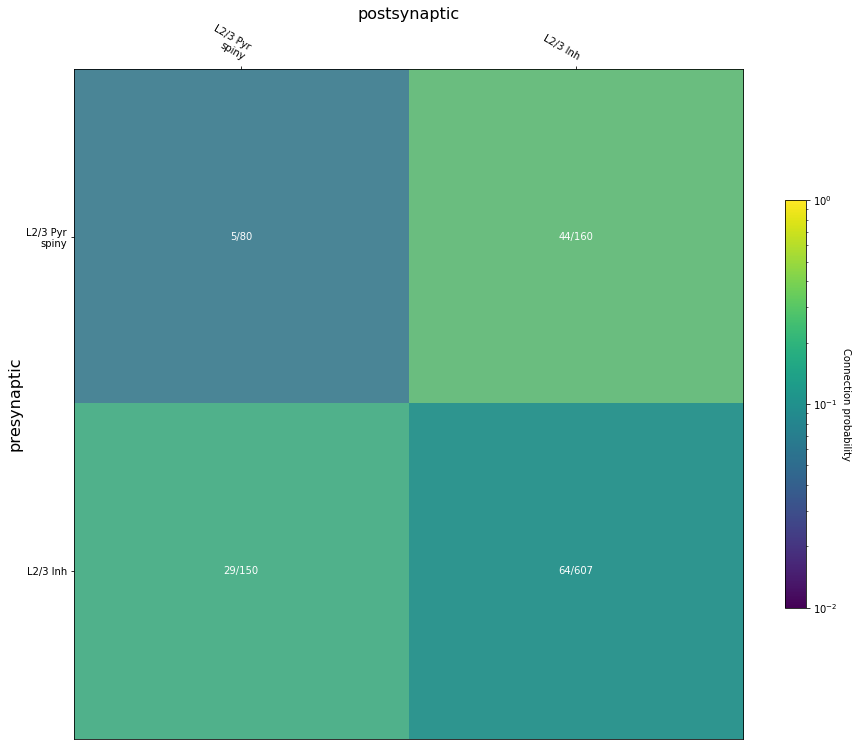

In [14]:
import matplotlib.colors, matplotlib.cm
import matplotlib.pyplot as plt
from aisynphys.ui.notebook import show_connectivity_matrix

# define a colormap and log normalization used to color the heatmap
norm = matplotlib.colors.LogNorm(vmin=0.01, vmax=1.0, clip=True)
cmap = matplotlib.cm.get_cmap('viridis')

# define the display labels to use for each cell subclass:
class_labels = {
    'l23pyr': 'L2/3 Pyr\nspiny',
    'l23inh':  'L2/3 Inh',
}

# create a figure/axes to draw on
fig, ax = plt.subplots(figsize=(15, 15))

# finally, draw the colormap using the provided function:
im, cbar, labels = show_connectivity_matrix(
    ax=ax, 
    results=results, 
    pre_cell_classes=cell_classes.values(), 
    post_cell_classes=cell_classes.values(), 
    class_labels=class_labels, 
    cmap=cmap, 
    norm=norm
)

In [15]:
EEprob = results['l23pyr', 'l23pyr']['connection_probability'][0]
IEprob = results['l23pyr', 'l23inh']['connection_probability'][0]
EIprob = results['l23inh', 'l23pyr']['connection_probability'][0]
IIprob = results['l23inh', 'l23inh']['connection_probability'][0]

In [16]:
print("EE: %f connection probability" % EEprob)
print("IE: %f connection probability" % IEprob)
print("EI: %f connection probability" % EIprob)
print("II: %f connection probability" % IIprob)

EE: 0.062500 connection probability
IE: 0.275000 connection probability
EI: 0.193333 connection probability
II: 0.105437 connection probability


# Combined estimate

In [17]:
EEcomb = EEstr*EEprob
IEcomb = IEstr*IEprob
EIcomb = EIstr*EIprob
IIcomb = IIstr*IIprob
print("EE: %f combined estimate" % EEcomb)
print("IE: %f combined estimate" % IEcomb)
print("EI: %f combined estimate" % EIcomb)
print("II: %f combined estimate" % IIcomb)

EE: 0.000006 combined estimate
IE: 0.000128 combined estimate
EI: -0.000070 combined estimate
II: -0.000056 combined estimate


Text(0.5, 0, 'postsyn')

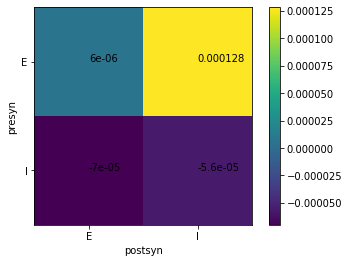

In [18]:
plt.imshow([[EEcomb, IEcomb], [EIcomb, IIcomb]], cmap=cmap)
plt.xticks([0,1], ['E', 'I'])
plt.yticks([1, 0], ['I', 'E'])
plt.ylim([1.5, -0.5])
plt.colorbar()
plt.annotate(np.round(EEcomb, 6), (0,0))
plt.annotate(np.round(IEcomb, 6), (1,0))
plt.annotate(np.round(EIcomb, 6), (0,1))
plt.annotate(np.round(IIcomb, 6), (1,1))
plt.ylabel('presyn')
plt.xlabel('postsyn')

# Careful

In [25]:
# Careful with false positives for morphological criteria
db.pair_query(post_class=CellClass(cre_type='vip', pyramidal=True), project_name=["mouse V1 coarse matrix", "mouse V1 pre production"]).dataframe()

,id,experiment_id,pre_cell_id,post_cell_id,has_synapse,has_electrical,crosstalk_artifact,n_ex_test_spikes,n_in_test_spikes,distance,meta


In [26]:
# Careful with false positives for cre types
db.pair_query(pre_class=inh_class, synapse=True, synapse_type='ex', project_name=["mouse V1 coarse matrix", "mouse V1 pre production"]).dataframe()

,id,experiment_id,pre_cell_id,post_cell_id,has_synapse,has_electrical,crosstalk_artifact,n_ex_test_spikes,n_in_test_spikes,distance,meta
0,61512,1827,10766,10761,True,False,None,430,370,0.000063,None
1,65825,1968,11565,11561,True,False,None,419,300,0.000099,None
